<a href="https://colab.research.google.com/github/vsvale/IGTI-Bootcamp-Desenvolvedor-Python/blob/main/IGTI_Mod_5_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means is an unsupervised machine learning algorithm that groups data into k number of clusters. The number of clusters is user-defined and the algorithm will try to group the data even if this number is not optimal for the specific case.



# Random 100

In [ ]:
import random

data = {'x': random.sample(range(1, 10000), 100),'y': random.sample(range(1, 10000), 100)}

In [ ]:
from pandas import DataFrame

df = DataFrame(data,columns=['x','y'])
df.head()

,x,y
0,7453,6432
1,4612,3214
2,2135,3080
3,5530,9507
4,3207,6831


In [ ]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,25)
for k in K:
  kmeanModel = KMeans(n_clusters =k)
  kmeanModel.fit(df)
  distortions.append(kmeanModel.inertia_)

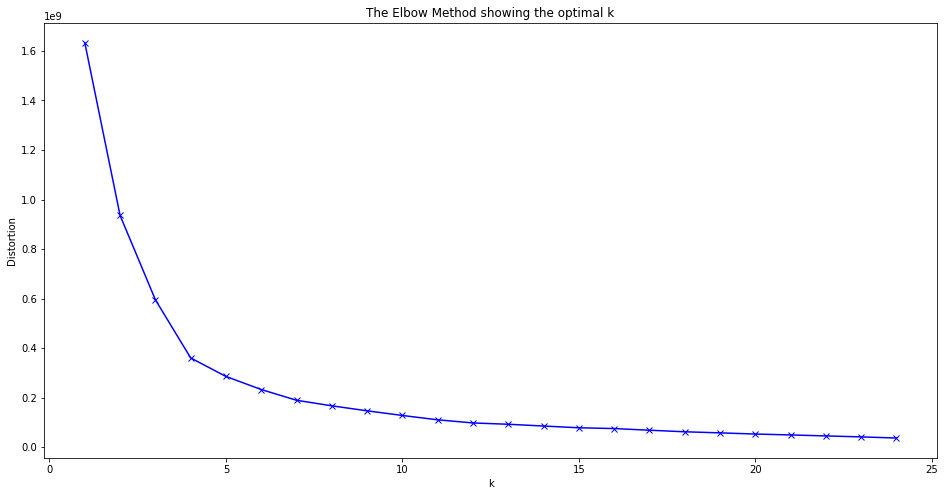

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
model = KMeans(n_clusters =4)
model.fit(df)
centroids = model.cluster_centers_ #centroids cordinates
centroids

array([[7008.75862069, 7566.27586207],
       [2343.25      , 6820.42857143],
       [2832.33333333, 1411.71428571],
       [7636.22727273, 2357.45454545]])

Text(0, 0.5, 'Y')

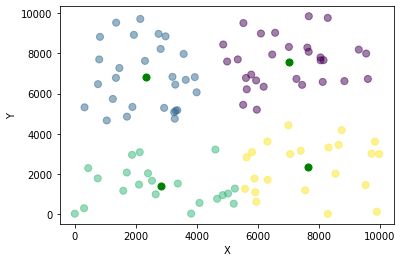

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['x'],df['y'], c=model.labels_.astype(float),s=50,alpha=0.5)
plt.scatter(centroids[:,0],centroids[:,1],c='green',s=50)
plt.xlabel('X')
plt.ylabel('Y')

# Iris

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets
iris = datasets.load_iris()

df=pd.DataFrame(iris['data'])
print(df.head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [ ]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

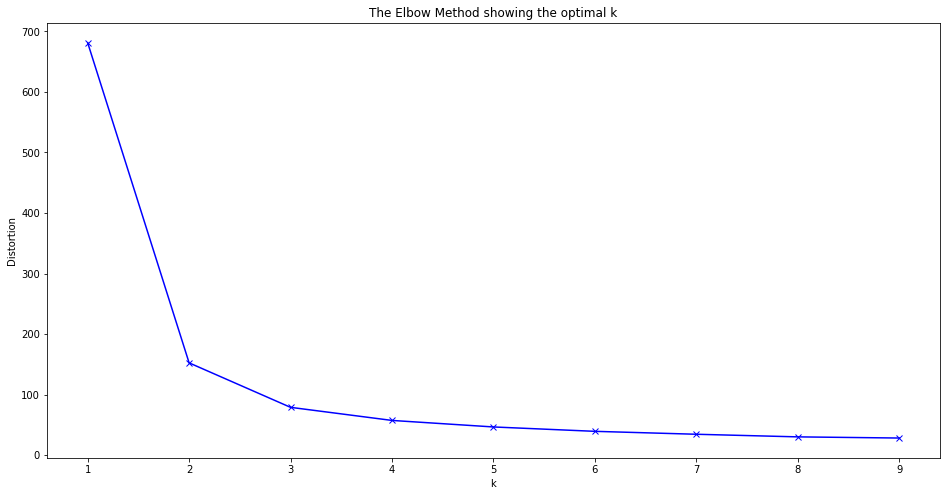

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'K_Means')

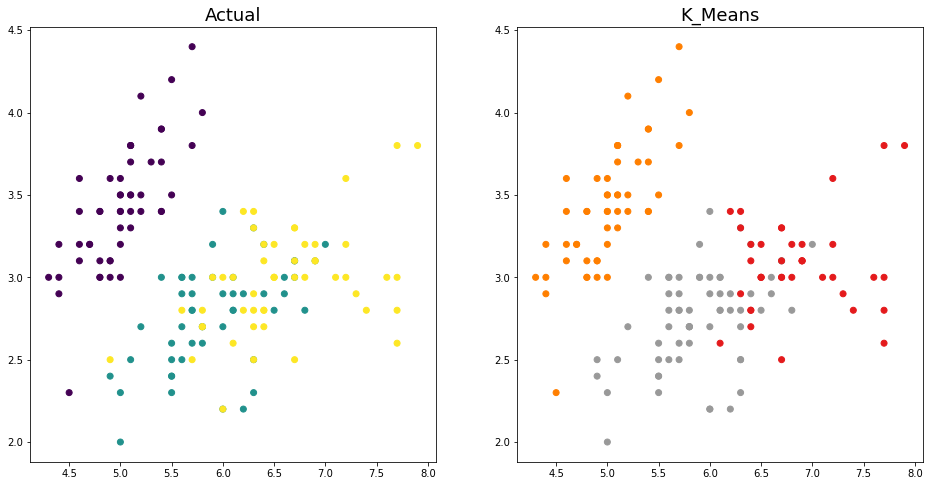

In [ ]:
df['k_means']=kmeanModel.predict(df)
df['target']=iris['target']
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df[0], df[1], c=df['target'])
axes[1].scatter(df[0], df[1], c=df['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)